
<img style="float: right;" src="data/logo.png" width= "200" height = "200">

# EART23202: Interpreting the Stratigraphic Record

### Exploring geological data with Python

___ 
#### Learning outcomes
* Load data into a Python workspace
* Plot data using Python packages
* Perform some statistical analysis on the data
___

#### Outline:
You have been in to the field and measured a conformable section of sedimentary rocks in the Peak District (the Sheffield Formation and the Manchester Formation). 

You have collected:

* Bed thickness data 
* Grain size data
* Paleocurrent data
* Structural data

You have also correlated your section with oxygen isotope data that someone else measured from the same section a few years ago (Hutton and Tharp, 2017). They only reported the data, and did not document the geology in detail.

You are back at home, and you want to:
1. inspect the data
2. plot the data
3. interpret the data
____

### 1) Inspect the data 
first we import pre-built Python packages that we are going to use to analyse our data:

In [2]:
import numpy as np ## numbers
import pandas as pd ## tables
import matplotlib.pyplot as plt ## plotting
import seaborn as sns ## plotting
from scipy import stats ## statistics

%config InlineBackend.figure_formats = ['svg'] ## displaying data

then we load the data using one of those packages - Pandas (like Excel for Python):

In [3]:
log = pd.read_excel('data/data.xlsx')

now we want to check the data is loaded correctly:

In [4]:
log

height  bed_number  bed_thickness  grainsize  paleocurrent  strike   dip  \
0      0.83           1           2.60          0           309     NaN   NaN   
1      0.75           2           2.88          0           310   256.0  42.0   
2      9.82           3           3.36          0           296     NaN   NaN   
3     12.75           4           3.37          0           292   232.0  38.0   
4     20.16           5           0.08          0           287     NaN   NaN   
..      ...         ...            ...        ...           ...     ...   ...   
95  1488.43          96          42.25          6           355   232.0  30.0   
96  1523.87          97          26.95          5           351     NaN   NaN   
97  1556.05          98          38.01          5           355   226.0  31.0   
98  1579.83          99          31.35          5           354     NaN   NaN   
99  1623.69         100          35.41          5           354   260.0  29.0   

               formation  d18O  
0    Sheffield Formation  0.09  
1    Sheffield Formation  0.25  
2    Sheffield Formation  0.16  
3    Sheffield Formation  0.21  
4    Sheffield Formation  0.19  
..                   ...   ...  
95  Manchester Formation  0.82  
96  Manchester Formation  1.05  
97  Manchester Formation  1.00  
98  Manchester Formation  0.95  
99  Manchester Formation  1.10  

[100 rows x 9 columns]

### 2) Plot the data

 Lets check how the bed thickness & grain size changes with height

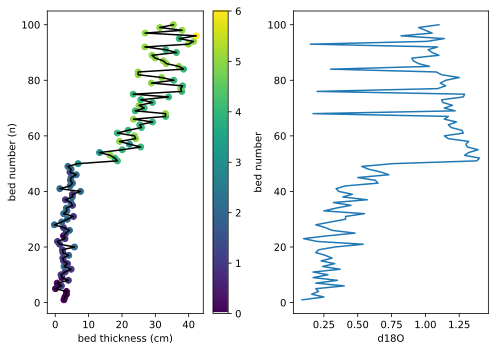

In [11]:
fig, ax = plt.subplots(figsize = (7, 5), ncols = 2)

ax[0].plot(log.bed_thickness, log.bed_number, 'k')
cax = ax[0].scatter(log.bed_thickness, log.bed_number, c = log.grainsize)
plt.colorbar(cax, ax = ax[0])

ax[1].plot(log.d18O, log.bed_number)

ax[0].set(xlabel = 'bed thickness (cm)', ylabel = 'bed number (n)')
ax[1].set(xlabel = 'd18O', ylabel = 'bed number')

plt.tight_layout()

# plt.savefig('field.jpg', dpi = 300)

It looks as though bed thickness is related to d18O, can this be quantified? 

### 3) Statistics

Let's check Spearman rank correlation

In [6]:
stats.spearmanr(log.bed_thickness, log.d18O)[0].round(2)

0.6

Interesting...now lets check if each formation is different

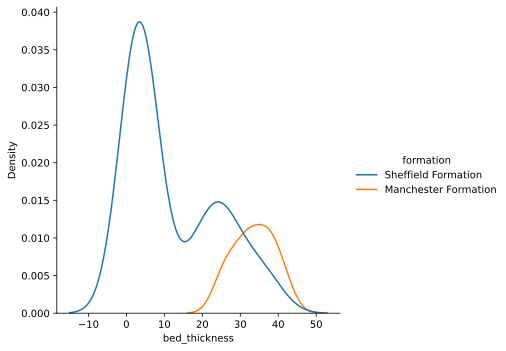

In [7]:
sns.displot(kind = 'kde', data = log, x = log.bed_thickness, hue = log.formation)